In [1]:
import matplotlib as mpl, pandas as pd, seaborn as sns, numpy as np, itertools
from matplotlib import pyplot as plt
from SelfSuperReconst.utils import cprintm, cprintc, cprint1
chained = lambda l: list(itertools.chain(*l))
sns.set()
sns.set_context("paper", font_scale=1.4)

In [2]:
df = pd.read_pickle('eval_results/eval.pkl')
df

,exp_name,score,distance_metric_name,eval_depth,collapse_func,n_way,repeats,rank
0,sub3_rgbd_noDE,"[1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, ...",perceptual_vgg_noncal,0,,5,10,0
1,sub3_rgbd_noDE,"[0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.05...",perceptual_vgg_noncal,0,,5,10,1
2,sub3_rgbd_noDE,"[0.9, 1.0, 1.0, 0.8, 0.9, 0.9, 1.0, 1.0, 0.8, ...",perceptual_vgg_noncal,0,,10,10,0
3,sub3_rgbd_noDE,"[0.01111111111111111, 0.0, 0.0, 0.022222222222...",perceptual_vgg_noncal,0,,10,10,1
4,sub3_rgb_only_noDE,"[0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",perceptual_vgg_noncal,0,,5,10,0
5,sub3_rgb_only_noDE,"[0.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",perceptual_vgg_noncal,0,,5,10,1
6,sub3_rgb_only_noDE,"[0.8, 1.0, 1.0, 1.0, 0.8, 0.9, 1.0, 1.0, 1.0, ...",perceptual_vgg_noncal,0,,10,10,0
7,sub3_rgb_only_noDE,"[0.03333333333333333, 0.0, 0.0, 0.0, 0.0222222...",perceptual_vgg_noncal,0,,10,10,1
8,sub3_rgbd_noDE,"[1.0, 1.0, 1.0, 0.9, 0.8, 0.9, 1.0, 1.0, 0.5, ...",perceptual_vgg_noncal_depth,1,,5,10,0
9,sub3_rgbd_noDE,"[0.0, 0.0, 0.0, 0.025, 0.05, 0.025, 0.0, 0.0, ...",perceptual_vgg_noncal_depth,1,,5,10,1


### RGB only recovery

In [3]:
target_exps = chained([
    f'sub{sbj_num}_rgb_only_noDE',
    ] for sbj_num in [3])

my_df = df[(df.collapse_func == '') & (df.n_way > 0) & \
           (df.n_way <= 1000) & (df.repeats.isin([10])) & \
          (df.exp_name.isin(target_exps)) & \
#           (df['rank'] == 1) & \
           (df.distance_metric_name == 'perceptual_vgg_noncal') & \
           (df.eval_depth == 0)
          ]

fn = lambda x: '_'.join(x.split('_')[1:])
my_df.exp_name = my_df.exp_name.apply(fn)
my_df = my_df.explode('score')
my_df.loc[my_df['rank']==1, 'score'] = my_df[my_df['rank']==1].score * (my_df[my_df['rank']==1].n_way - 1) + 1
my_df.exp_name.unique()

/home/guyga/.conda/envs/guyga-gpu-new/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['rgb_only_noDE'], dtype=object)

/home/guyga/.conda/envs/guyga-gpu-new/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


n_way  exp_name     
5      rgb_only_noDE    1.0
10     rgb_only_noDE    1.0
Name: score, dtype: float64


Text(0.5, 0.98, 'RGB-only identification accuracy/rank for subject 3 (higher/lower is better)')

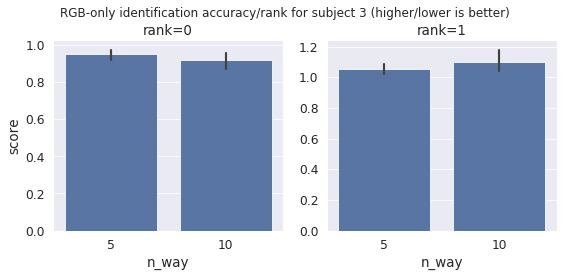

In [4]:
g = sns.catplot(x='n_way', y='score', hue='exp_name', col='rank', kind="bar", data=my_df, legend=False, legend_out=True, sharey=False)
g.set_titles(col_template='rank={col_name}')

plt.gcf().set_size_inches(8, 4)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.96])

ax1 = g.axes[0][0]
nways = np.unique(my_df.n_way.values)

plt.minorticks_on()
ax1.grid(axis='y', which='minor', color='#999999', linewidth=.3, alpha=0.3)

my_df.score = my_df.score.astype(float)

cprintm(my_df.groupby(['n_way', 'exp_name']).mean().score.round())
plt.suptitle(f'RGB-only identification accuracy/rank for subject 3 (higher/lower is better)')

### Depth identification (DepthRecoveryOptions)

In [5]:
target_exps = chained([
    f'sub{sbj_num}_rgbd_noDE',
    f'sub{sbj_num}_depth_only_noDE',
#     f'sub{sbj_num}_rgb_only_noDE',
# ] for sbj_num in [1,2,3,4,5])
    ] for sbj_num in [3])

my_df = df[(df.collapse_func == '') & (df.n_way > 0) & \
           (df.n_way <= 1000) & (df.repeats.isin([10])) & \
          (df.exp_name.isin(target_exps)) & \
#           (df['rank'] == 1) & \
           (df.distance_metric_name == 'perceptual_vgg_noncal_depth') & \
           (df.eval_depth == 1)
          ]

fn = lambda x: '_'.join(x.split('_')[1:])
my_df.exp_name = my_df.exp_name.apply(fn)
my_df = my_df.explode('score')
my_df.loc[my_df['rank']==1, 'score'] = my_df[my_df['rank']==1].score * (my_df[my_df['rank']==1].n_way - 1) + 1
my_df.exp_name.unique()

/home/guyga/.conda/envs/guyga-gpu-new/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['rgbd_noDE', 'depth_only_noDE'], dtype=object)

/home/guyga/.conda/envs/guyga-gpu-new/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


n_way  exp_name       
5      depth_only_noDE    1.0
       rgbd_noDE          1.0
10     depth_only_noDE    1.0
       rgbd_noDE          1.0
Name: score, dtype: float64


Text(0.5, 0.98, 'DEPTH identification accuracy/rank across methods for subject 3 (higher/lower is better)')

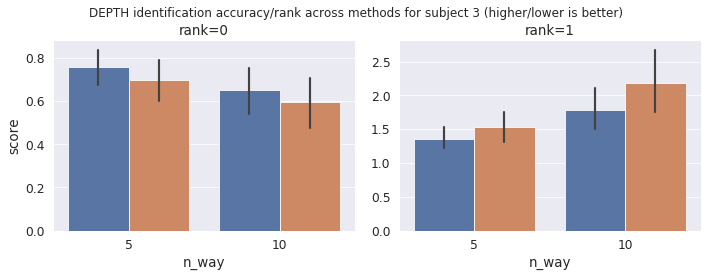

In [6]:
g = sns.catplot(x='n_way', y='score', hue='exp_name', col='rank', kind="bar", data=my_df, legend=False, legend_out=True, sharey=False)
g.set_titles(col_template='rank={col_name}')

plt.gcf().set_size_inches(10, 4)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.96])

ax1 = g.axes[0][0]
nways = np.unique(my_df.n_way.values)

plt.minorticks_on()
ax1.grid(axis='y', which='minor', color='#999999', linewidth=.3, alpha=0.3)

my_df.score = my_df.score.astype(float)

cprintm(my_df.groupby(['n_way', 'exp_name']).mean().score.round())
plt.suptitle(f'DEPTH identification accuracy/rank across methods for subject 3 (higher/lower is better)')